In [1]:
%load_ext watermark


In [2]:
from IPython.display import display
import pandas as pd
import seaborn as sns
from teeplot import teeplot as tp


In [3]:
%watermark -diwmuv -iv


Last updated: 2024-11-08T02:58:21.455772+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.5.0-1025-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

seaborn: 0.13.2
teeplot: 1.1.3
pandas : 2.2.3

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2024-11-07-scientific"
teeplot_subdir


'2024-11-07-scientific'

## Prep Data


In [5]:
df = pd.read_csv("https://osf.io/eg7m9/download")
display(df.describe()), display(df.head()), display(df.tail());


,true answer,llm answer,score,score - invalid as nan,replicate,num_taxa
count,3780.000000,3367.000000,3780.000000,3367.000000,3780.00000,3780.000000
mean,0.569048,0.621028,0.631746,0.709237,4.00000,10.714286
std,0.712230,0.699807,0.482395,0.454182,2.58233,7.592622
min,0.000000,0.000000,0.000000,0.000000,0.00000,3.000000
25%,0.000000,0.000000,0.000000,0.000000,2.00000,4.000000
50%,0.000000,0.000000,1.000000,1.000000,4.00000,8.000000
75%,1.000000,1.000000,1.000000,1.000000,6.00000,18.000000
max,2.000000,2.000000,1.000000,1.000000,8.00000,25.000000


,prompt,choices,response,true answer,llm answer,score,score - invalid as nan,timestamp,replicate,question,num_taxa,tree representation,tree source,model
0,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-07T17:42:51.154564,0,question_equivalence_identical,3,newick,sample_phylogeny_newick,gpt-4o-mini
1,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-07T17:42:51.506550,0,question_equivalence_identical,3,json,sample_phylogeny_newick,gpt-4o-mini
2,Do the two given phylogenies represent the sam...,"yes, the phylogenies are equivalent|no, the ph...",1,0,1.0,0.0,0.0,2024-11-07T17:42:52.014092,0,question_equivalence_identical,3,none,sample_phylogeny_newick,gpt-4o-mini
3,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-07T17:42:52.400815,0,question_equivalence_identical,3,newick,scientific_phylogeny_newick,gpt-4o-mini
4,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-07T17:42:52.740404,0,question_equivalence_identical,3,json,scientific_phylogeny_newick,gpt-4o-mini


,prompt,choices,response,true answer,llm answer,score,score - invalid as nan,timestamp,replicate,question,num_taxa,tree representation,tree source,model
3775,Consider the following phylogenetic tree:\n\n ...,T09|T06|neither,1,1,1.0,1.0,1.0,2024-11-07T18:12:33.661508,8,question_most_related_to_x,25,json,sample_phylogeny_newick,gpt-4o
3776,Which among T09 and T06 are most closely relat...,T09|T06|neither,"I'm sorry, but I don't have enough context to ...",1,NaN,0.0,NaN,2024-11-07T18:12:34.196351,8,question_most_related_to_x,25,none,sample_phylogeny_newick,gpt-4o
3777,Consider the following phylogenetic tree:\n\n ...,Takifugu rubripes|Latrodectus|neither,0,0,0.0,1.0,1.0,2024-11-07T18:12:34.480784,8,question_most_related_to_x,25,newick,scientific_phylogeny_newick,gpt-4o
3778,Consider the following phylogenetic tree:\n\n ...,Takifugu rubripes|Latrodectus|neither,0,0,0.0,1.0,1.0,2024-11-07T18:12:34.848564,8,question_most_related_to_x,25,json,scientific_phylogeny_newick,gpt-4o
3779,Which among Takifugu rubripes and Latrodectus ...,Takifugu rubripes|Latrodectus|neither,0,0,0.0,1.0,1.0,2024-11-07T18:12:35.179840,8,question_most_related_to_x,25,none,scientific_phylogeny_newick,gpt-4o


In [6]:
df["Q"] = df["question"].str.slice(9)


In [7]:
df["num choices"] = df["choices"].str.count(r"\|") + 1


In [8]:
df["adj score"] = df["score"] * df["num choices"]


In [9]:
df["tree repr"] = df["tree representation"]


In [10]:
display(df.describe()), display(df.head()), display(df.tail());


,true answer,llm answer,score,score - invalid as nan,replicate,num_taxa,num choices,adj score
count,3780.000000,3367.000000,3780.000000,3367.000000,3780.00000,3780.000000,3780.000000,3780.000000
mean,0.569048,0.621028,0.631746,0.709237,4.00000,10.714286,2.400000,1.518783
std,0.712230,0.699807,0.482395,0.454182,2.58233,7.592622,0.489963,1.223574
min,0.000000,0.000000,0.000000,0.000000,0.00000,3.000000,2.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,2.00000,4.000000,2.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,4.00000,8.000000,2.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,6.00000,18.000000,3.000000,3.000000
max,2.000000,2.000000,1.000000,1.000000,8.00000,25.000000,3.000000,3.000000


,prompt,choices,response,true answer,llm answer,score,score - invalid as nan,timestamp,replicate,question,num_taxa,tree representation,tree source,model,Q,num choices,adj score,tree repr
0,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-07T17:42:51.154564,0,question_equivalence_identical,3,newick,sample_phylogeny_newick,gpt-4o-mini,equivalence_identical,2,2.0,newick
1,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-07T17:42:51.506550,0,question_equivalence_identical,3,json,sample_phylogeny_newick,gpt-4o-mini,equivalence_identical,2,2.0,json
2,Do the two given phylogenies represent the sam...,"yes, the phylogenies are equivalent|no, the ph...",1,0,1.0,0.0,0.0,2024-11-07T17:42:52.014092,0,question_equivalence_identical,3,none,sample_phylogeny_newick,gpt-4o-mini,equivalence_identical,2,0.0,none
3,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-07T17:42:52.400815,0,question_equivalence_identical,3,newick,scientific_phylogeny_newick,gpt-4o-mini,equivalence_identical,2,2.0,newick
4,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...",0,0,0.0,1.0,1.0,2024-11-07T17:42:52.740404,0,question_equivalence_identical,3,json,scientific_phylogeny_newick,gpt-4o-mini,equivalence_identical,2,2.0,json


,prompt,choices,response,true answer,llm answer,score,score - invalid as nan,timestamp,replicate,question,num_taxa,tree representation,tree source,model,Q,num choices,adj score,tree repr
3775,Consider the following phylogenetic tree:\n\n ...,T09|T06|neither,1,1,1.0,1.0,1.0,2024-11-07T18:12:33.661508,8,question_most_related_to_x,25,json,sample_phylogeny_newick,gpt-4o,most_related_to_x,3,3.0,json
3776,Which among T09 and T06 are most closely relat...,T09|T06|neither,"I'm sorry, but I don't have enough context to ...",1,NaN,0.0,NaN,2024-11-07T18:12:34.196351,8,question_most_related_to_x,25,none,sample_phylogeny_newick,gpt-4o,most_related_to_x,3,0.0,none
3777,Consider the following phylogenetic tree:\n\n ...,Takifugu rubripes|Latrodectus|neither,0,0,0.0,1.0,1.0,2024-11-07T18:12:34.480784,8,question_most_related_to_x,25,newick,scientific_phylogeny_newick,gpt-4o,most_related_to_x,3,3.0,newick
3778,Consider the following phylogenetic tree:\n\n ...,Takifugu rubripes|Latrodectus|neither,0,0,0.0,1.0,1.0,2024-11-07T18:12:34.848564,8,question_most_related_to_x,25,json,scientific_phylogeny_newick,gpt-4o,most_related_to_x,3,3.0,json
3779,Which among Takifugu rubripes and Latrodectus ...,Takifugu rubripes|Latrodectus|neither,0,0,0.0,1.0,1.0,2024-11-07T18:12:35.179840,8,question_most_related_to_x,25,none,scientific_phylogeny_newick,gpt-4o,most_related_to_x,3,3.0,none


## Example Plot


teeplots/2024-11-07-scientific/col=q+hue=tree-source+kind=line+model=gpt-4o+palette=muted+row=tree-repr+viz=relplot+x=num-taxa+y=score+ext=.pdf
teeplots/2024-11-07-scientific/col=q+hue=tree-source+kind=line+model=gpt-4o+palette=muted+row=tree-repr+viz=relplot+x=num-taxa+y=score+ext=.png


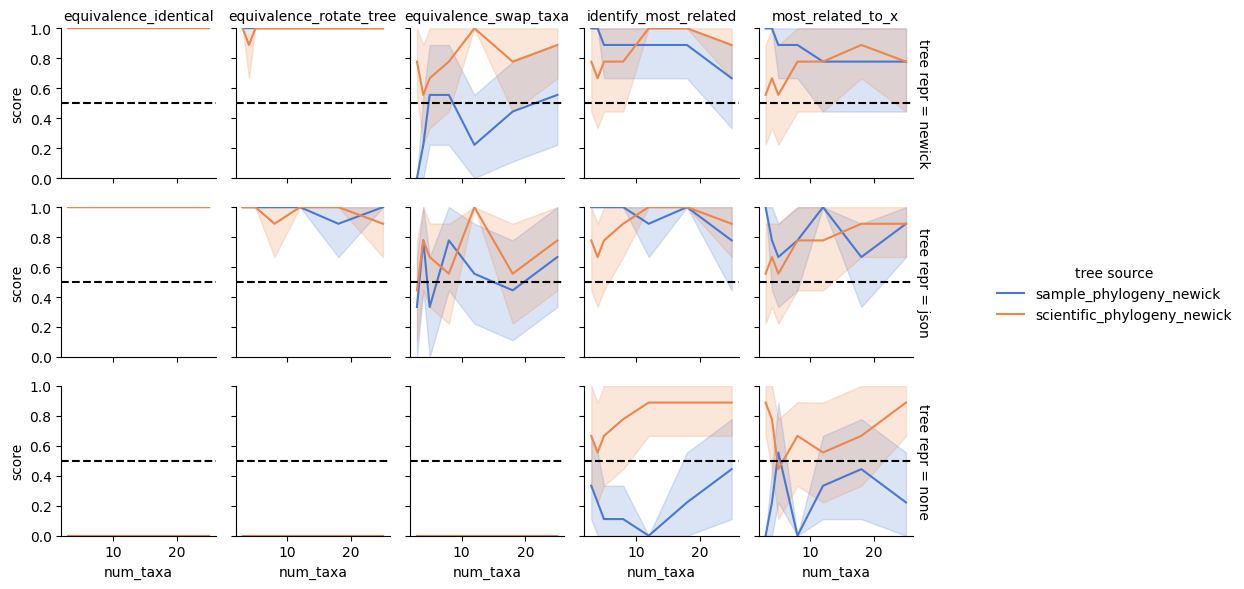

teeplots/2024-11-07-scientific/col=q+hue=tree-source+kind=line+model=gpt-4o-mini+palette=muted+row=tree-repr+viz=relplot+x=num-taxa+y=score+ext=.pdf
teeplots/2024-11-07-scientific/col=q+hue=tree-source+kind=line+model=gpt-4o-mini+palette=muted+row=tree-repr+viz=relplot+x=num-taxa+y=score+ext=.png


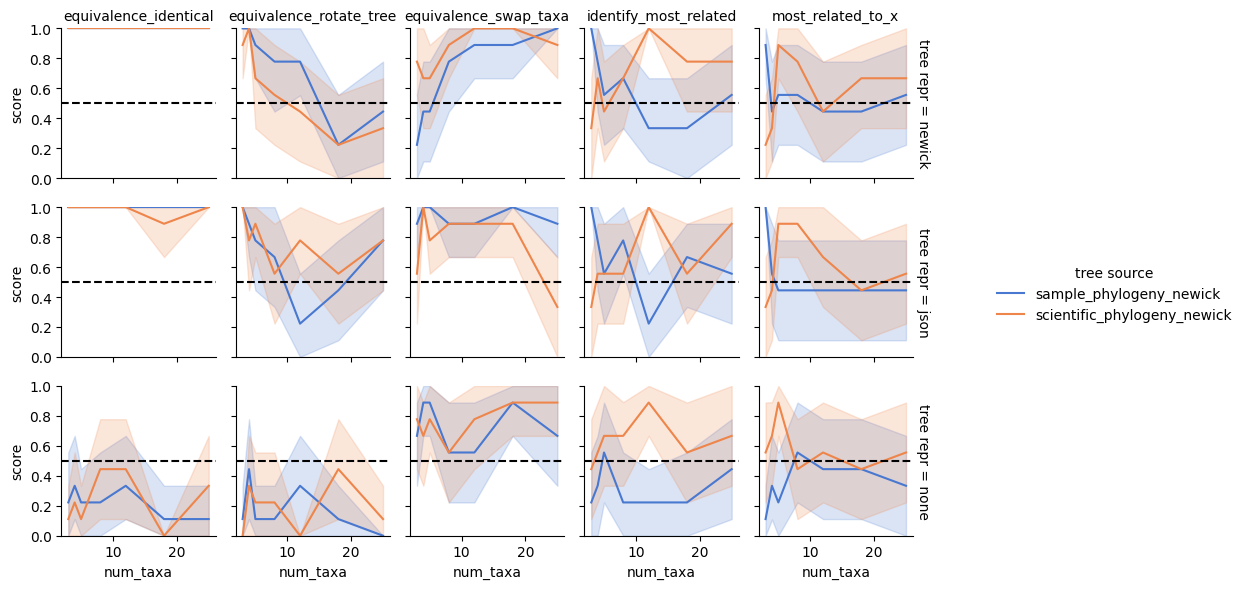

In [11]:
for model, group in df.groupby("model"):
    saveit, teed = tp.tee(
        sns.relplot,
        data=group,
        x="num_taxa",
        y="score",
        hue="tree source",
        col="Q",
        row="tree repr",
        height=2,
        facet_kws=dict(
            margin_titles=True,
        ),
        kind="line",
        palette="muted",
        teeplot_callback=True,
        teeplot_outattrs=dict(
            model=model,
        ),
        teeplot_subdir=teeplot_subdir,
    )

    teed.set(ylim=(0, 1.0))
    teed.refline(y=0.5, linestyle="--", color="black")
    teed.set_titles(col_template="{col_name}")

    saveit()


teeplots/2024-11-07-scientific/col=q+hue=tree-source+kind=line+model=gpt-4o+palette=muted+row=tree-repr+viz=relplot+x=num-taxa+y=adj-score+ext=.pdf
teeplots/2024-11-07-scientific/col=q+hue=tree-source+kind=line+model=gpt-4o+palette=muted+row=tree-repr+viz=relplot+x=num-taxa+y=adj-score+ext=.png


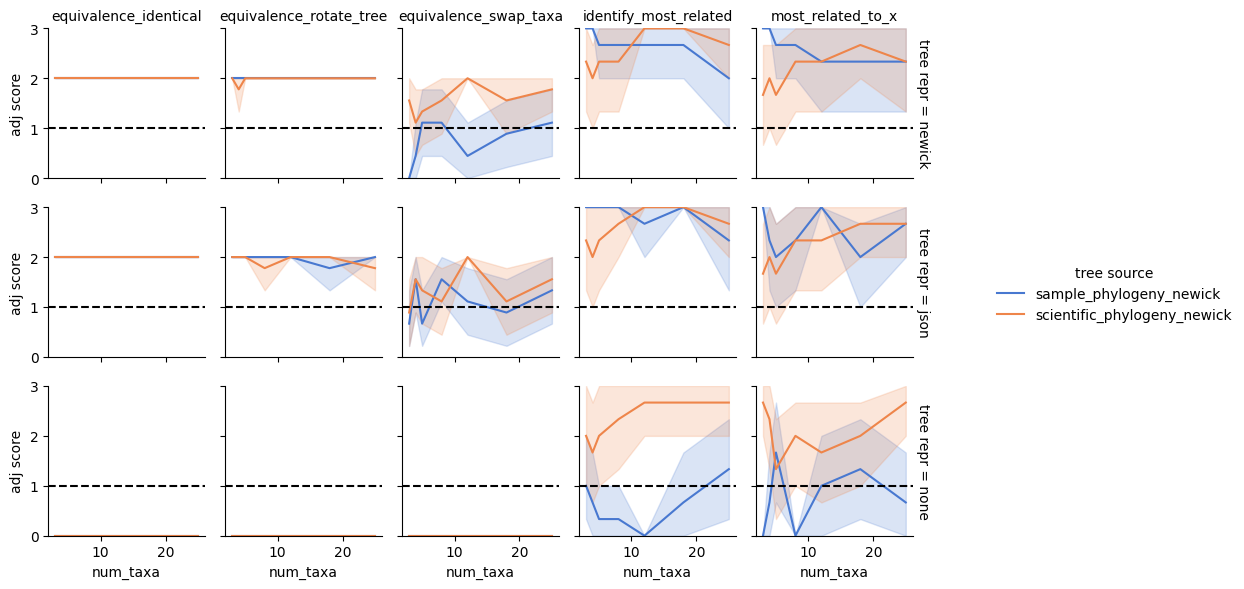

teeplots/2024-11-07-scientific/col=q+hue=tree-source+kind=line+model=gpt-4o-mini+palette=muted+row=tree-repr+viz=relplot+x=num-taxa+y=adj-score+ext=.pdf
teeplots/2024-11-07-scientific/col=q+hue=tree-source+kind=line+model=gpt-4o-mini+palette=muted+row=tree-repr+viz=relplot+x=num-taxa+y=adj-score+ext=.png


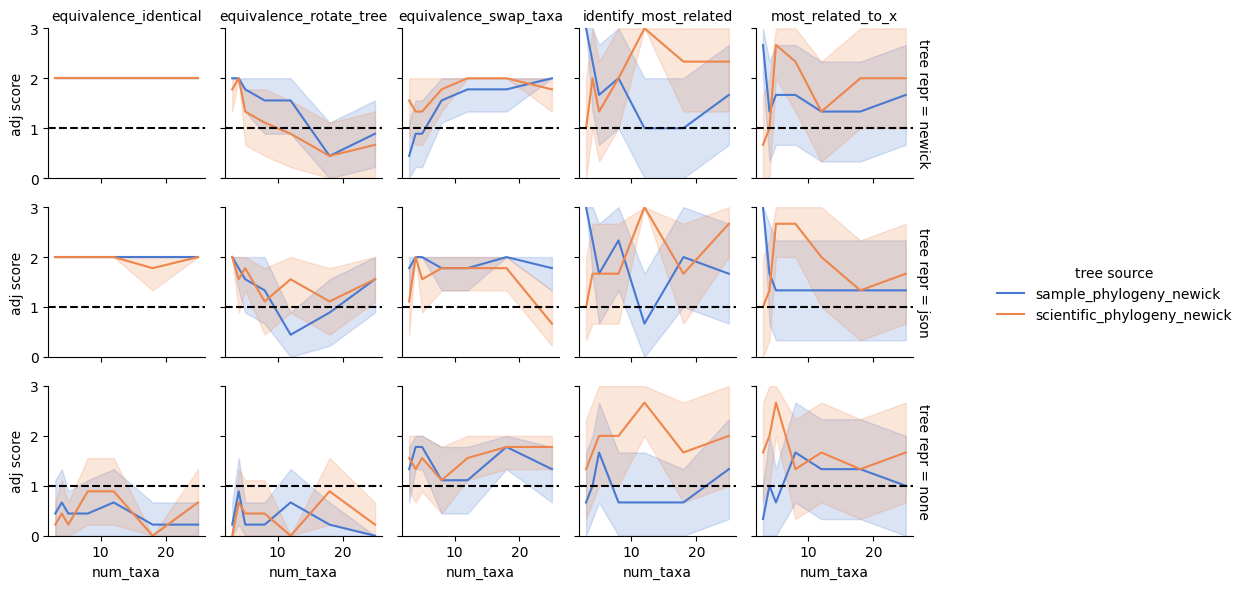

In [12]:
for model, group in df.groupby("model"):
    saveit, teed = tp.tee(
        sns.relplot,
        data=group,
        x="num_taxa",
        y="adj score",
        hue="tree source",
        col="Q",
        row="tree repr",
        height=2,
        facet_kws=dict(
            margin_titles=True,
        ),
        kind="line",
        palette="muted",
        teeplot_callback=True,
        teeplot_outattrs=dict(
            model=model,
        ),
        teeplot_subdir=teeplot_subdir,
    )

    teed.set(ylim=(0, 3.0))
    teed.refline(y=1.0, linestyle="--", color="black")
    teed.set_titles(col_template="{col_name}")

    saveit()
